In [2]:
import tensorflow as tf
import os
import numpy as np
from keras.preprocessing.image import load_img,img_to_array,array_to_img
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle.json

!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.69G/2.70G [00:27<00:00, 171MB/s]
100% 2.70G/2.70G [00:27<00:00, 104MB/s]


In [7]:
from zipfile import ZipFile
with ZipFile('/content/new-plant-diseases-dataset.zip', 'r') as zipObj: zipObj.extractall()

In [4]:
dataset_root = "/content/plant_disease_dataset/train"

In [5]:
n_of_image,label_name = 650,['Apple scab', 'Apple Black rot', 'Apple Cedar apple rust', 'Apple healthy', 'Cherry Powdery mildew',
         'Cherry healthy','Corn Cercospora leaf spot Gray leaf spot', 'Corn Common rust', 'Corn Northern Leaf Blight','Corn healthy',
         'Grape Black rot', 'Grape Esca', 'Grape Leaf blight', 'Grape healthy','Peach Bacterial spot','Peach healthy', 'Pepper bell Bacterial spot',
         'Pepper bell healthy', 'Potato Early blight', 'Potato Late blight', 'Potato healthy', 'Strawberry Leaf scorch', 'Strawberry healthy',
         'Tomato Bacterial spot', 'Tomato Early blight', 'Tomato Late blight', 'Tomato Leaf Mold', 'Tomato Septoria leaf spot',
         'Tomato Spider mites', 'Tomato Target Spot', 'Tomato Yellow Leaf Curl Virus', 'Tomato mosaic virus', 'Tomato healthy']

img,label,img_size = [],[],(150,150)

In [8]:
# Apple Scab
path_dir = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab'
os.chdir(path_dir)
img_path_list = os.listdir(path_dir)

for len_no, img_path in enumerate(img_path_list):
    if len_no == n_of_image:
        break
    else:
        img.append(img_to_array(load_img(img_path, target_size=img_size)) / 255)
        label.append(0)  # Apple___Apple_scab


In [9]:
# Apple Black Rot
path_dir = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Black_rot'
os.chdir(path_dir)
img_path_list = os.listdir(path_dir)

for len_no, img_path in enumerate(img_path_list):
    if len_no == n_of_image:
        break
    else:
        img.append(img_to_array(load_img(img_path, target_size=img_size)) / 255)
        label.append(1)  # Apple___Black_rot


In [10]:
# Apple Cedar Apple Rust
path_dir = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Cedar_apple_rust'
os.chdir(path_dir)
img_path_list = os.listdir(path_dir)

for len_no, img_path in enumerate(img_path_list):
    if len_no == n_of_image:
        break
    else:
        img.append(img_to_array(load_img(img_path, target_size=img_size)) / 255)
        label.append(2)  # Apple___Cedar_apple_rust


In [11]:
# Apple Healthy
path_dir = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___healthy'
os.chdir(path_dir)
img_path_list = os.listdir(path_dir)

for len_no, img_path in enumerate(img_path_list):
    if len_no == n_of_image:
        break
    else:
        img.append(img_to_array(load_img(img_path, target_size=img_size)) / 255)
        label.append(3)  # Apple___healthy


In [12]:
# Load Grape Black rot images
path_dir = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Black_rot'
os.chdir(path_dir)
img_path_list = os.listdir(path_dir)
for len_no, img_path in enumerate(img_path_list):
    if len_no == n_of_image: break
    img.append(img_to_array(load_img(img_path, target_size=img_size)) / 255)
    label.append(10)  # Grape Black rot


In [13]:
from PIL import UnidentifiedImageError

# Load images with error handling
path_dir = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___healthy'
os.chdir(path_dir)
img_path_list = os.listdir(path_dir)
for len_no, img_path in enumerate(img_path_list):
    if len_no == n_of_image:
        break
    try:
        # Attempt to load the image
        image = img_to_array(load_img(img_path, target_size=img_size)) / 255
        img.append(image)
        label.append(3)  # Apple healthy
    except UnidentifiedImageError:
        # Skip the file if it cannot be opened as an image
        print(f"Skipped file: {img_path} (unidentified image error)")


In [14]:
# Load Grape Leaf blight images
path_dir = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
os.chdir(path_dir)
img_path_list = os.listdir(path_dir)
for len_no, img_path in enumerate(img_path_list):
    if len_no == n_of_image: break
    img.append(img_to_array(load_img(img_path, target_size=img_size)) / 255)
    label.append(12)  # Grape Leaf blight


In [15]:
# Load Grape healthy images
path_dir = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___healthy'
os.chdir(path_dir)
img_path_list = os.listdir(path_dir)
for len_no, img_path in enumerate(img_path_list):
    if len_no == n_of_image: break
    img.append(img_to_array(load_img(img_path, target_size=img_size)) / 255)
    label.append(13)  # Grape Healthy


In [16]:
# Load Peach Bacterial spot images
path_dir = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Peach___Bacterial_spot'
os.chdir(path_dir)
img_path_list = os.listdir(path_dir)
for len_no, img_path in enumerate(img_path_list):
    if len_no == n_of_image: break
    img.append(img_to_array(load_img(img_path, target_size=img_size)) / 255)
    label.append(14)  # Peach Bacterial spot


In [17]:
# Load Peach healthy images
path_dir = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Peach___healthy'
os.chdir(path_dir)
img_path_list = os.listdir(path_dir)
for len_no, img_path in enumerate(img_path_list):
    if len_no == n_of_image: break
    img.append(img_to_array(load_img(img_path, target_size=img_size)) / 255)
    label.append(15)  # Peach Healthy


In [18]:
# Load Pepper bell Bacterial spot images
path_dir = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Pepper,_bell___Bacterial_spot'
os.chdir(path_dir)
img_path_list = os.listdir(path_dir)
for len_no, img_path in enumerate(img_path_list):
    if len_no == n_of_image: break
    img.append(img_to_array(load_img(img_path, target_size=img_size)) / 255)
    label.append(16)  # Pepper Bell Bacterial Spot


In [19]:
# Load Pepper bell healthy images
path_dir = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Pepper,_bell___healthy'
os.chdir(path_dir)
img_path_list = os.listdir(path_dir)
for len_no, img_path in enumerate(img_path_list):
    if len_no == n_of_image: break
    img.append(img_to_array(load_img(img_path, target_size=img_size)) / 255)
    label.append(17)  # Pepper Bell Healthy


In [20]:
img = np.array(img)
label = np.array(label)

# You can shuffle and split the dataset as required.


In [21]:
IMG_SHAPE = img_size + (3,)  # Ensure the input shape is a tuple with height, width, and channels
resnet50 = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=IMG_SHAPE)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [22]:
for layer in resnet50.layers[:143]:  # Adjust the range based on your use case
    layer.trainable = False

In [23]:
resnet50.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 150, 150, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 156, 156, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 75, 75, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 75, 75, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 75, 75, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 77, 77, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 38, 38, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 38, 38, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 38, 38, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 38, 38, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 38, 38, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 38, 38, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 38, 38, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 38, 38, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 38, 38, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 14,976,000 (57.13 MB)

 Non-trainable params: 8,611,712 (32.85 MB)

In [24]:
import pandas as pd

pd.set_option('max_colwidth', None)

# Extract details for ResNet50 layers
layer_resnet = [(layer, layer.name, layer.trainable) for layer in resnet50.layers]
pd.DataFrame(layer_resnet, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])


,Layer Type,Layer Name,Layer Trainable
0,"<InputLayer name=input_layer, built=True>",input_layer,False
1,"<ZeroPadding2D name=conv1_pad, built=True>",conv1_pad,False
2,"<Conv2D name=conv1_conv, built=True>",conv1_conv,False
3,"<BatchNormalization name=conv1_bn, built=True>",conv1_bn,False
4,"<Activation name=conv1_relu, built=True>",conv1_relu,False
...,...,...,...
170,"<Activation name=conv5_block3_2_relu, built=True>",conv5_block3_2_relu,True
171,"<Conv2D name=conv5_block3_3_conv, built=True>",conv5_block3_3_conv,True
172,"<BatchNormalization name=conv5_block3_3_bn, built=True>",conv5_block3_3_bn,True
173,"<Add name=conv5_block3_add, built=True>",conv5_block3_add,True


In [25]:
img_train, img_test, label_train, label_test = train_test_split(img, label, test_size=0.2, random_state=42)


In [30]:
# 🚀 Save test images and labels
np.save("img_test.npy", img_test)  # Save test images
np.save("label_test.npy", label_test)  # Save test labels

print("✅ Test dataset saved as 'img_test.npy' and 'label_test.npy'.")


✅ Test dataset saved as 'img_test.npy' and 'label_test.npy'.


In [26]:
os.chdir('/content')

In [27]:
import numpy as np

# Your list of class names
label_name = [
    'Apple scab', 'Apple Black rot', 'Apple Cedar apple rust', 'Apple healthy', 'Cherry Powdery mildew',
    'Cherry healthy', 'Corn Cercospora leaf spot Gray leaf spot', 'Corn Common rust', 'Corn Northern Leaf Blight', 'Corn healthy',
    'Grape Black rot', 'Grape Esca', 'Grape Leaf blight', 'Grape healthy', 'Peach Bacterial spot', 'Peach healthy',
    'Pepper bell Bacterial spot', 'Pepper bell healthy', 'Potato Early blight', 'Potato Late blight', 'Potato healthy',
    'Strawberry Leaf scorch', 'Strawberry healthy', 'Tomato Bacterial spot', 'Tomato Early blight', 'Tomato Late blight',
    'Tomato Leaf Mold', 'Tomato Septoria leaf spot', 'Tomato Spider mites', 'Tomato Target Spot', 'Tomato Yellow Leaf Curl Virus',
    'Tomato mosaic virus', 'Tomato healthy'
]

# Save the list as a .npy file
np.save('class_names.npy', np.array(label_name))

print("Class names saved successfully as 'class_names.npy'.")


Class names saved successfully as 'class_names.npy'.


✅ Model loaded from 'mobilenetv2_model.h5'.
49/49 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step


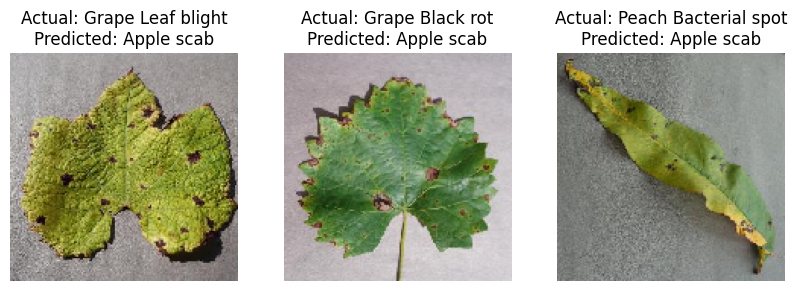

🎯 Model evaluation completed successfully!


In [32]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the trained model
MODEL_PATH = "mobilenetv2_model.h5"

if os.path.exists(MODEL_PATH):
    model = load_model(MODEL_PATH)
    print(f"✅ Model loaded from '{MODEL_PATH}'.")
else:
    raise FileNotFoundError(f"❌ Model not found at '{MODEL_PATH}'.")

# Load test dataset
img_test = np.load("img_test.npy")
label_test = np.load("label_test.npy")
class_names = np.load("class_names.npy", allow_pickle=True)

# Resize test images to (224, 224) to match model input size
img_test_resized = tf.image.resize(img_test, (224, 224))

# Ensure labels are correctly formatted
if len(label_test.shape) == 2:  # One-hot encoded (2D)
    actual_labels = np.argmax(label_test, axis=1)
else:
    actual_labels = label_test  # Already class indices

# Make predictions
predictions = model.predict(img_test_resized)
predicted_labels = np.argmax(predictions, axis=1)

# 🚀 Display random test images with predictions
def show_images(indices):
    plt.figure(figsize=(10, 5))
    for i, idx in enumerate(indices):
        img = img_test[idx]
        if img.max() <= 1:  # Rescale for display
            img = (img * 255).astype(np.uint8)

        plt.subplot(1, len(indices), i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Actual: {class_names[actual_labels[idx]]}\nPredicted: {class_names[predicted_labels[i]]}")

    plt.show()

# Show random 3 test images with their predictions
random_indices = np.random.choice(len(img_test), size=3, replace=False)
show_images(random_indices)

print("🎯 Model evaluation completed successfully!")


Shape of img_train_resized: (520, 224, 224, 3)
Shape of label_train: (520, 33)
Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.6004 - loss: 1.8692 - val_accuracy: 1.0000 - val_loss: 0.0288
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 1.0000 - loss: 0.0174 - val_accuracy: 1.0000 - val_loss: 0.0047
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 50s 3s/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 8/100
17/17 ━━━━━━━━━━━━━━

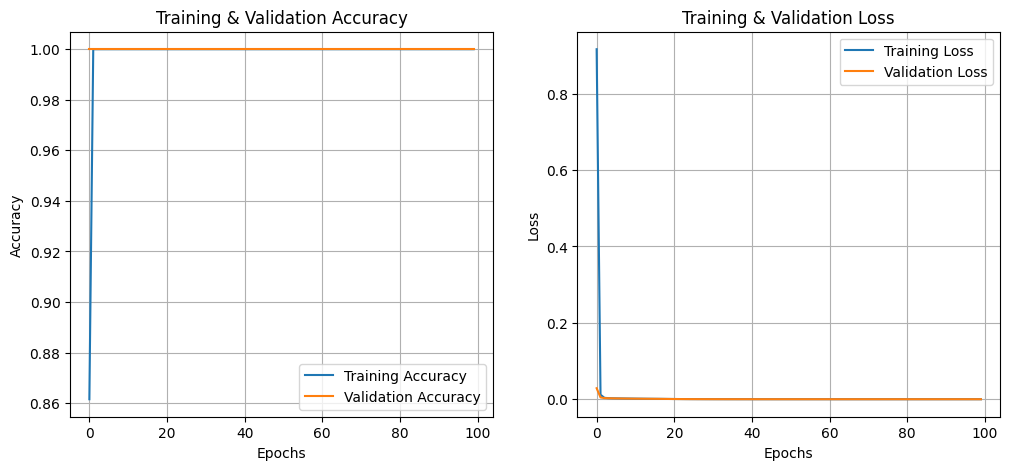

In [ ]:
#mobilenetv2
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img, img_to_array  # Import load_img and img_to_array
import os


# Define constants
img_size = (224, 224)  # MobileNetV2 expects 224x224 images
IMG_SHAPE = img_size + (3,)  # Add 3 channels for RGB
label_name = ['Apple scab', 'Apple Black rot', 'Apple Cedar apple rust', 'Apple healthy', 'Cherry Powdery mildew',
         'Cherry healthy','Corn Cercospora leaf spot Gray leaf spot', 'Corn Common rust', 'Corn Northern Leaf Blight','Corn healthy',
         'Grape Black rot', 'Grape Esca', 'Grape Leaf blight', 'Grape healthy','Peach Bacterial spot','Peach healthy', 'Pepper bell Bacterial spot',
         'Pepper bell healthy', 'Potato Early blight', 'Potato Late blight', 'Potato healthy', 'Strawberry Leaf scorch', 'Strawberry healthy',
         'Tomato Bacterial spot', 'Tomato Early blight', 'Tomato Late blight', 'Tomato Leaf Mold', 'Tomato Septoria leaf spot',
         'Tomato Spider mites', 'Tomato Target Spot', 'Tomato Yellow Leaf Curl Virus', 'Tomato mosaic virus', 'Tomato healthy'] # Define label_name here
num_classes = len(label_name)

# Initialize img and label lists before loading images
img, label = [], []
n_of_image = 650

# Apple Scab
path_dir = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab'
os.chdir(path_dir)
img_path_list = os.listdir(path_dir)
for len_no, img_path in enumerate(img_path_list):
    if len_no == n_of_image:
        break
    else:
        img.append(img_to_array(load_img(img_path, target_size=img_size)) / 255)
        label.append(0)  # Apple___Apple_scab

# ... (Load data for other classes similarly) ...

# Load MobileNetV2 with pre-trained weights and exclude top layers
base_model = MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

# Build the new model
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = tf.keras.layers.Rescaling(1./255)(inputs)  # Normalize input images
x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)  # Global pooling layer
x = Dense(512, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Before resizing, ensure img_train and img_test are defined:
# Assuming 'img' and 'label' are lists containing image data and labels
img = np.array(img)  # Convert 'img' list to a NumPy array
label = np.array(label)  # Convert 'label' list to a NumPy array
img_train, img_test, label_train, label_test = train_test_split(img, label, test_size=0.2, random_state=42)

# Resize images to (224, 224)
img_train_resized = tf.image.resize(img_train, img_size)
img_test_resized = tf.image.resize(img_test, img_size)

# Ensure labels are in correct shape
label_train = np.array(label_train).reshape(-1)  # Flatten to 1D
label_test = np.array(label_test).reshape(-1)  # Flatten to 1D

# Convert labels to one-hot encoding
label_train = to_categorical(label_train, num_classes=num_classes)
label_test = to_categorical(label_test, num_classes=num_classes)

# Ensure the shapes match
print("Shape of img_train_resized:", img_train_resized.shape)  # Should be (num_samples, 224, 224, 3)
print("Shape of label_train:", label_train.shape)  # Should be (num_samples, num_classes)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the generator on the training data
datagen.fit(img_train_resized)

# Train the model for 100 epochs
history = model.fit(
    datagen.flow(img_train_resized, label_train, batch_size=32),
    epochs=100,
    validation_data=(img_test_resized, label_test)
)

# Plot training & validation accuracy and loss curves
plt.figure(figsize=(12, 5))

# Accuracy curve
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid(True)

# Loss curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step


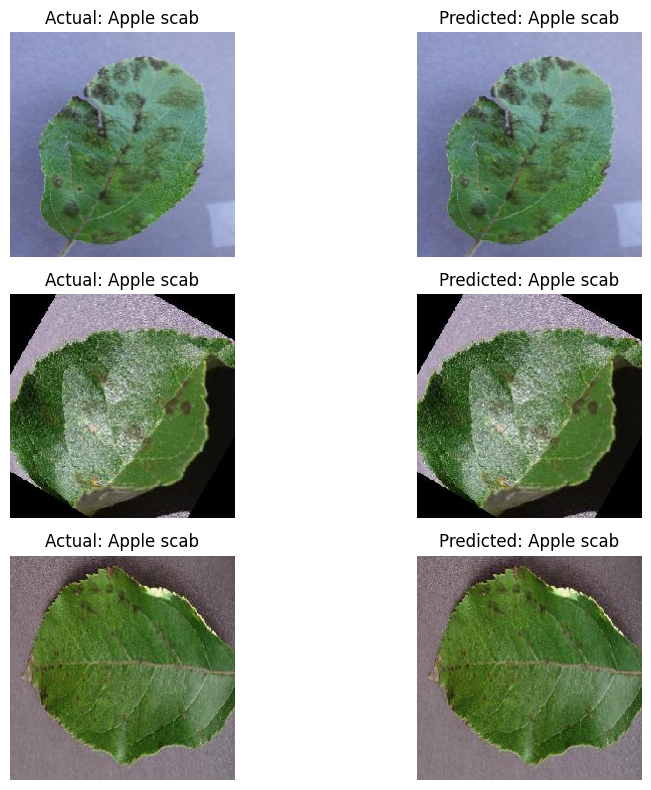

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test dataset
predictions = model.predict(img_test_resized)  # img_test_resized is your test data (already resized and preprocessed)

# Store the predicted classes (the class with the highest probability)
predicted_classes = np.argmax(predictions, axis=1)  # Get the predicted class for each image

# Store the actual classes (true labels)
actual_classes = np.argmax(label_test, axis=1)  # Actual classes from the test labels

# Randomly select 3 indices from the test set
random_indices = np.random.choice(len(img_test_resized), size=3, replace=False)

# Create a figure for side-by-side images with smaller size
fig, axes = plt.subplots(3, 2, figsize=(10, 8))  # Reduce the figsize to make the plot smaller (e.g., 10x8)

# Display the selected random images with actual vs predicted labels
for idx, i in enumerate(random_indices):
    # Plot Actual Image
    axes[idx, 0].imshow(img_test_resized[i])  # Display the image
    axes[idx, 0].axis('off')  # Turn off axis for better visualization
    actual_label = label_name[actual_classes[i]]
    axes[idx, 0].set_title(f"Actual: {actual_label}")  # Set actual label as title

    # Plot Predicted Image
    axes[idx, 1].imshow(img_test_resized[i])  # Display the same image
    axes[idx, 1].axis('off')  # Turn off axis for better visualization
    predicted_label = label_name[predicted_classes[i]]
    axes[idx, 1].set_title(f"Predicted: {predicted_label}")  # Set predicted label as title

# Adjust layout for better spacing and ensure everything fits
plt.tight_layout()
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step
Accuracy: 1.0000
Precision (Macro): 1.0000
Recall (Macro): 1.0000
F1-Score (Macro): 1.0000


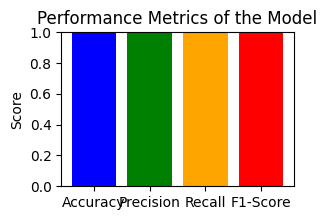

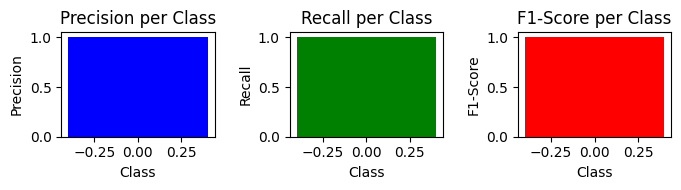

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support

# Make predictions on the test dataset
predictions = model.predict(img_test_resized)  # img_test_resized is your test data (already resized and preprocessed)

# Store the predicted classes (the class with the highest probability)
predicted_classes = np.argmax(predictions, axis=1)  # Get the predicted class for each image

# Store the actual classes (true labels)
actual_classes = np.argmax(label_test, axis=1)  # Actual classes from the test labels

# Calculate Accuracy
accuracy = accuracy_score(actual_classes, predicted_classes)

# Calculate Precision, Recall, and F1-score (using macro average to handle imbalanced classes)
precision = precision_score(actual_classes, predicted_classes, average='macro', zero_division=0)
recall = recall_score(actual_classes, predicted_classes, average='macro', zero_division=0)
f1 = f1_score(actual_classes, predicted_classes, average='macro', zero_division=0)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro): {recall:.4f}")
print(f"F1-Score (Macro): {f1:.4f}")

# Create bar plots for the metrics with even smaller size
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

# Plotting the bar graph with further reduced size
plt.figure(figsize=(3, 2))  # Further reduced figure size
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.title('Performance Metrics of the Model')
plt.ylabel('Score')
plt.show()

# If you also want to see the metrics per class (Precision, Recall, F1-score per class), you can use:
precision_class, recall_class, f1_class, _ = precision_recall_fscore_support(actual_classes, predicted_classes, average=None)

# Create a figure with even smaller size for per-class metrics
fig, axes = plt.subplots(1, 3, figsize=(7, 2))  # Further reduced figure size for per-class metrics

# Precision for each class
axes[0].bar(range(len(precision_class)), precision_class, color='blue')
axes[0].set_title('Precision per Class')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Precision')

# Recall for each class
axes[1].bar(range(len(recall_class)), recall_class, color='green')
axes[1].set_title('Recall per Class')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Recall')

# F1-score for each class
axes[2].bar(range(len(f1_class)), f1_class, color='red')
axes[2].set_title('F1-Score per Class')
axes[2].set_xlabel('Class')
axes[2].set_ylabel('F1-Score')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
